# 1st Importing files and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean,median,mode,stdev,variance
df=pd.read_csv('1. Weather Data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# 2nd Cleaning process- Noise 

In [2]:
# Checking for noise in categorical data columns

for c in df.select_dtypes('object').columns:
    print(df[c].value_counts())

1/1/2012 0:00       1
9/1/2012 3:00       1
8/31/2012 21:00     1
8/31/2012 22:00     1
8/31/2012 23:00     1
                   ..
5/1/2012 17:00      1
5/1/2012 16:00      1
5/1/2012 15:00      1
5/1/2012 14:00      1
12/31/2012 23:00    1
Name: Date/Time, Length: 8784, dtype: int64
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                 

In [3]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [4]:
# This function will change all noise value of numerical columns to null
df["Temp_C"] = pd.to_numeric(df["Temp_C"], errors = "coerce") 
df["Dew Point Temp_C"] = pd.to_numeric(df["Dew Point Temp_C"], errors = "coerce") 
df["Rel Hum_%"] = pd.to_numeric(df["Rel Hum_%"], errors = "coerce") 
df["Wind Speed_km/h"] = pd.to_numeric(df["Wind Speed_km/h"], errors = "coerce") 
df["Visibility_km"] = pd.to_numeric(df["Visibility_km"], errors = "coerce") 
df["Press_kPa"] = pd.to_numeric(df["Press_kPa"], errors = "coerce") 

In [5]:
## sum of null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# Q. 3)  Find all the unique 'Wind Speed' values in the data.

In [6]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

# Q. 4) Find the number of times when the 'Weather is exactly Clear'.

In [7]:
df__=df[(df["Weather"] == 'Clear')]
df__['Weather'].count()

1326

# Q. 5) Find the number of times when the 'Wind Speed was exactly 4 km/h'.

In [8]:
df_Wind = df[(df["Wind Speed_km/h"] == 4)]
df_Wind['Wind Speed_km/h'].count()

474

# Q. 6) Find out all the Null Values in the data.

In [9]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# Q. 7) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

In [10]:
df.rename(columns={'Weather':'Weather Condition'},inplace=True)

# Q. 8) What is the Standard Deviation of 'Pressure'  in this data?

In [11]:
df['Press_kPa'].std()

0.8440047459486474

# Q. 9) What is the Variance of 'Relative Humidity' in this data ?

In [12]:
df['Rel Hum_%'].var()

286.2485501984998

# Q. 10) Find all instances when 'Snow' was recorded.

In [13]:
df[(df["Weather Condition"] == 'Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Q. 11) Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

In [14]:
df_Condition = df[(df["Wind Speed_km/h"] > 24 )]
df_Condition[(df_Condition["Visibility_km"] == 25 )]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


# Q. 12) What is the Mean value of each column against each 'Weather Condition ?

In [15]:
df.groupby(['Weather Condition']).agg(['mean'])

C:\Users\abc\AppData\Local\Temp\ipykernel_2184\3298067465.py:1: FutureWarning: ['Date/Time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['Weather Condition']).agg(['mean'])


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
,mean,mean,mean,mean,mean,mean
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067


# Q. 13) What is the Minimum & Maximum value of each column against each 'Weather Condition ?

In [16]:
df.groupby(['Weather Condition']).agg(['min','max'])

Date/Time                    \
                                                      min               max   
Weather Condition                                                             
Clear                                      1/11/2012 1:00     9/9/2012 5:00   
Cloudy                                     1/1/2012 17:00    9/9/2012 23:00   
Drizzle                                   1/23/2012 21:00    9/30/2012 3:00   
Drizzle,Fog                               1/23/2012 20:00    9/30/2012 2:00   
Drizzle,Ice Pellets,Fog                   12/17/2012 9:00   12/17/2012 9:00   
Drizzle,Snow                             12/17/2012 15:00  12/19/2012 18:00   
Drizzle,Snow,Fog                         12/18/2012 21:00   12/22/2012 3:00   
Fog                                         1/1/2012 0:00    9/22/2012 0:00   
Freezing Drizzle                          1/13/2012 10:00     2/1/2012 5:00   
Freezing Drizzle,Fog                        1/1/2012 2:00   12/10/2012 5:00   
Freezing Drizzle,Haze                      2/1/2012 11:00    2/1/2012 13:00   
Freezing Drizzle,Snow                      1/13/2012 3:00    3/2/2012 12:00   
Freezing Fog                               1/22/2012 6:00    3/17/2012 6:00   
Freezing Rain                             1/13/2012 11:00     2/1/2012 7:00   
Freezing Rain,Fog                         1/17/2012 23:00   12/17/2012 1:00   
Freezing Rain,Haze                         2/1/2012 14:00    2/1/2012 15:00   
Freezing Rain,Ice Pellets,Fog             12/17/2012 3:00   12/17/2012 3:00   
Freezing Rain,Snow Grains                  1/13/2012 9:00    1/13/2012 9:00   
Haze                                      1/22/2012 12:00   3/13/2012 23:00   
Mainly Clear                              1/10/2012 11:00     9/9/2012 9:00   
Moderate Rain,Fog                         12/10/2012 8:00   12/10/2012 8:00   
Moderate Snow                             1/12/2012 15:00   12/27/2012 9:00   
Moderate Snow,Blowing Snow               12/27/2012 10:00  12/27/2012 12:00   
Mostly Cloudy                              1/1/2012 16:00     9/9/2012 2:00   
Rain                                       1/1/2012 18:00     9/5/2012 2:00   
Rain Showers                               1/1/2012 22:00    9/8/2012 16:00   
Rain Showers,Fog                          10/20/2012 3:00   10/20/2012 3:00   
Rain Showers,Snow Showers                  11/4/2012 8:00   12/5/2012 10:00   
Rain,Fog                                  1/23/2012 18:00   9/30/2012 23:00   
Rain,Haze                                  3/13/2012 7:00    3/13/2012 9:00   
Rain,Ice Pellets                          12/18/2012 5:00   12/18/2012 5:00   
Rain,Snow                                  1/10/2012 5:00    4/23/2012 3:00   
Rain,Snow Grains                          12/21/2012 0:00   12/21/2012 0:00   
Rain,Snow,Fog                             12/8/2012 21:00   12/8/2012 21:00   
Rain,Snow,Ice Pellets                     12/21/2012 1:00   12/21/2012 5:00   
Snow                                       1/10/2012 1:00    4/27/2012 9:00   
Snow Pellets                             11/24/2012 15:00  11/24/2012 15:00   
Snow Showers                               1/12/2012 7:00    3/4/2012 21:00   
Snow Showers,Fog                          12/26/2012 9:00  12/29/2012 13:00   
Snow,Blowing Snow                         1/13/2012 21:00    2/25/2012 9:00   
Snow,Fog                                 12/16/2012 15:00   3/14/2012 19:00   
Snow,Haze                                  2/1/2012 17:00    2/1/2012 21:00   
Snow,Ice Pellets                          12/10/2012 3:00     3/3/2012 4:00   
Thunderstorms                              7/16/2012 1:00    7/4/2012 16:00   
Thunderstorms,Heavy Rain Showers           5/29/2012 6:00    5/29/2012 6:00   
Thunderstorms,Moderate Rain Showers,Fog    7/17/2012 6:00    7/17/2012 6:00   
Thunderstorms,Rain                        5/25/2012 20:00   7/23/2012 18:00   
Thunderstorms,Rain Showers                5/29/2012 16:00     9/8/2012 4:00   
Thunderstorms,Rain 

# Q. 14) Show all the Records where Weather Condition is Fog.

In [17]:
df[(df["Weather Condition"] == 'Fog')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


# Q. 15) Find all instances when : A. 'Weather is Clear' and 'Relative Humidity is greater than 50'

In [18]:
df_weather = df[(df["Weather Condition"] == 'Clear')]
df_weather[(df_weather["Rel Hum_%"] > 50 )]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
241,1/11/2012 1:00,-10.7,-17.8,56,17,25.0,101.49,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


# Q.16) To Find desciption of all numerical columns

In [19]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Q.17) To find Corelation of all columns

In [20]:
df.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


# Q.18) To Show heatmap correlation

<AxesSubplot:>

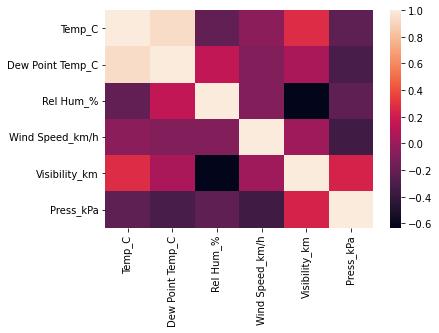

In [21]:
sns.heatmap(df.corr())

# Q.19) To Plot historgram for "Weather Condition"

<AxesSubplot:xlabel='Weather Condition', ylabel='Count'>

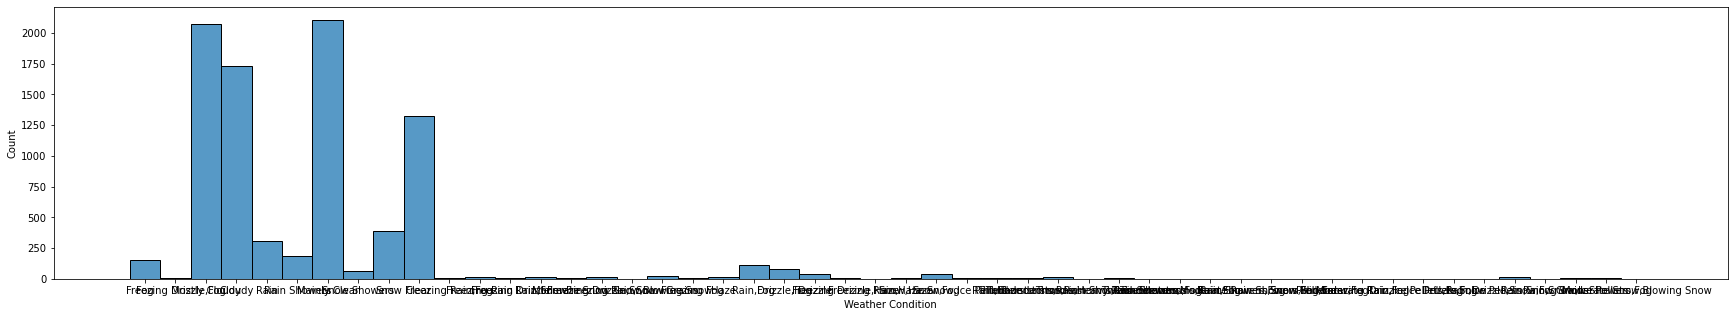

In [22]:
plt.figure(figsize =(30, 5))
sns.histplot(df['Weather Condition'])

# Q.20) Plot pairplot 

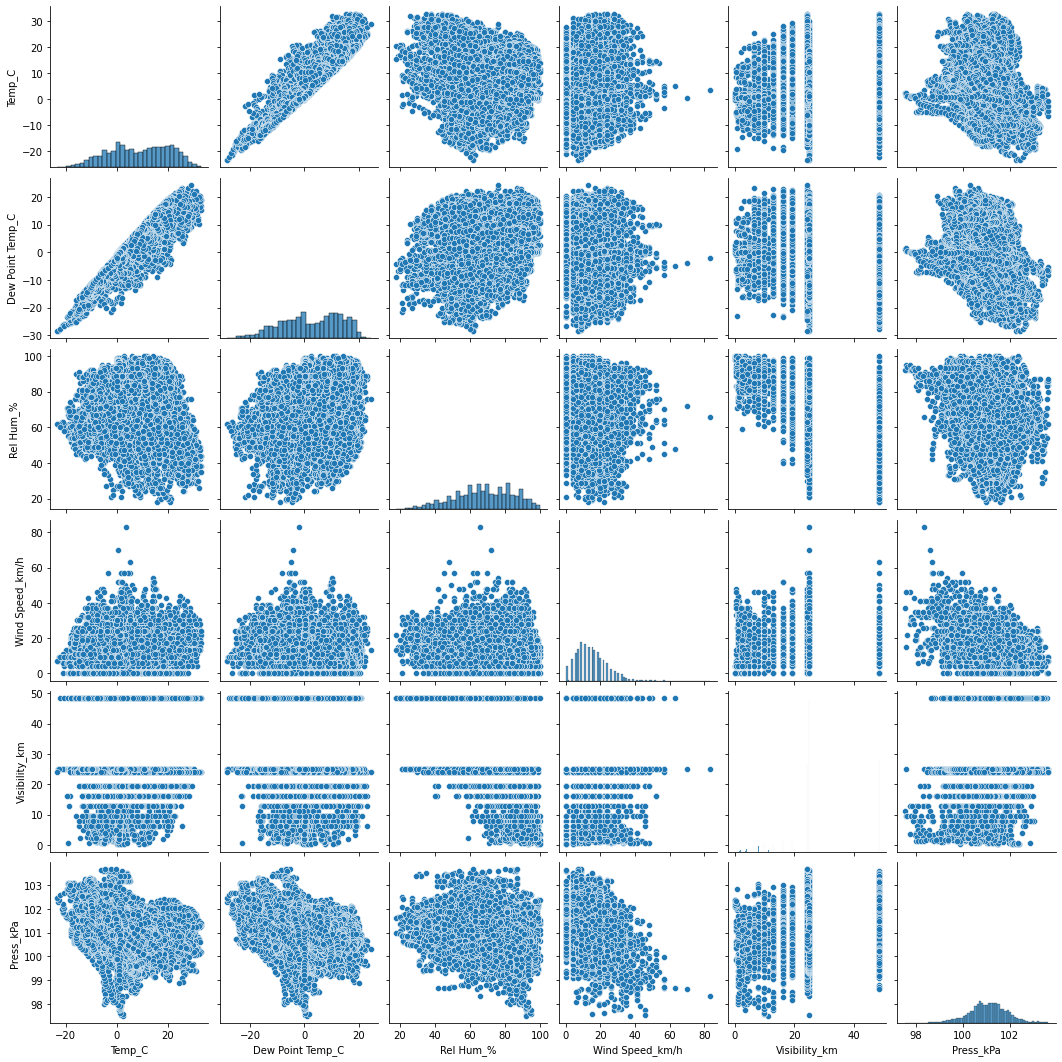

In [24]:
sns.pairplot(df)

# Q. 21) Scatter plot between Rel Hum_% and Wind Speed_km/h columns

<AxesSubplot:title={'center':'Scatter plot between two column Rel Hum_% and Wind Speed_km/h'}, xlabel='Rel Hum_%', ylabel='Wind Speed_km/h'>

<Figure size 2160x2160 with 0 Axes>

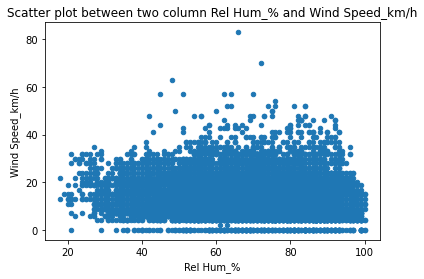

In [27]:
df.plot.scatter(x='Rel Hum_%', y='Wind Speed_km/h', title= "Scatter plot between two column Rel Hum_% and Wind Speed_km/h")